## Team Members:                                    
Name: Farah Mohamed Ahmed Ahmed Hegazy	    
ID: 20221452894

Name: Kholoud  Wahed Mohamed Mousa Elkhouly	 
ID: 20221444910

Name: Habiba Mohamed Atiia Mohamed	       
ID: 20221379966

Name: Habiba Yasser Mohammed	                 
ID: 20221377183

Name: Sara Mohamed Ahmed Ibrahim	            
ID: 20221380031

Name: Shahd Ahmed Karam	                    
ID: 20221380283

Name: Shereen Mohamed Saleh Mahmoud	        
ID: 20221445288

Name: Maryam Wael Mohamed Abd El-Wahab	     
ID: 20221444844

Name: Nour Ashraf Mohamed Abd El-Samie	      
ID: 210101067


In [75]:
#import important packages
import csv
import re # regular expressions 
import nltk #text preprocessing
import string 
#nltk.download('omw-1.4')
#nltk.download('wordnet')  
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
#nltk.download('stopwords')
#nltk.download('punkt')
import matplotlib.pyplot as plt
from collections import Counter
import pandas as pd 
#nltk.download('reuters')
from nltk.corpus import reuters
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

In [2]:
#reading data
data=pd.read_csv(r'E:\Gollege\Semester 5\Data Sciences Tools\reuters_data.csv')
data

,REUTERS TOPICS,TOPICS,TITLE,BODY
0,YES,cocoa,BAHIA COCOA REVIEW,Showers continued throughout the week in the B...
1,YES,grain,NATIONAL AVERAGE PRICES FOR FARMER-OWNED RESERVE,The U.S. Agriculture Department reported the f...
2,YES,veg-oil,ARGENTINE 1986/87 GRAIN/OILSEED REGISTRATIONS,Argentine grain board figures show crop regist...
3,YES,none,USX <X> DEBT DOWGRADED BY MOODY'S,Moody's Investors Service Inc said it lowered ...
4,YES,earn,CHAMPION PRODUCTS <CH> APPROVES STOCK SPLIT,Champion Products Inc said its board of direct...
...,...,...,...,...
13146,YES,earn,EASTERN UTILITIES ASSOCIATES 3RD QTR NET,Shr 86 cts vs 74 cts Net 11.1 mln vs 8.6 m...
13147,YES,trade,"EC, U.S. PLAN HIGH-LEVEL TRADE TALKS",The European Community is willing to offer lim...
13148,YES,crude,BRITAIN BACKS U.S. STRIKE ON IRAN OIL PLATFORM,British Foreign Secretary Sir Geoffrey Howe ba...
13149,YES,acq,SIMON AND SCHUSTER TO ACQUIRE WOODHEAD-FAULKNE...,SIMON AND SCHUSTER TO ACQUIRE WOODHEAD-FAULKNE...


## Data Cleaning

In [54]:
#data cleaning 
# Select columns with string data type
string_columns = data.select_dtypes(include=['object'])
 
# Apply the cleaning operation to string columns
data[string_columns.columns] = string_columns.apply(lambda x: x.str.replace('\n', '').str.replace('  ', ' '))
data

,REUTERS TOPICS,TOPICS,TITLE,BODY
0,yes,cocoa,bahia cocoa review,shower continued throughout the week in the ba...
1,yes,grain,national average price for farmerowned reserve,the u agriculture department reported the farm...
2,yes,vegoil,argentine 198687 grainoilseed registration,argentine grain board figure show crop registr...
3,yes,none,usx x debt dowgraded by moody,moody investor service inc said it lowered the...
4,yes,earn,champion product ch approves stock split,champion product inc said it board of director...
...,...,...,...,...
13146,yes,earn,eastern utility associate 3rd qtr net,shr 86 ct v 74 ct net 111 mln v 86 mln rev 877...
13147,yes,trade,ec u plan highlevel trade talk,the european community is willing to offer lim...
13148,yes,crude,britain back u strike on iran oil platform,british foreign secretary sir geoffrey howe ba...
13149,yes,acq,simon and schuster to acquire woodheadfaulkner...,simon and schuster to acquire woodheadfaulkner...


In [4]:
data = data.replace('NA', '')  #dealing with missing values 
data

,REUTERS TOPICS,TOPICS,TITLE,BODY
0,YES,cocoa,BAHIA COCOA REVIEW,Showers continued throughout the week in the B...
1,YES,grain,NATIONAL AVERAGE PRICES FOR FARMER-OWNED RESERVE,The U.S. Agriculture Department reported the f...
2,YES,veg-oil,ARGENTINE 1986/87 GRAIN/OILSEED REGISTRATIONS,Argentine grain board figures show crop regist...
3,YES,none,USX <X> DEBT DOWGRADED BY MOODY'S,Moody's Investors Service Inc said it lowered ...
4,YES,earn,CHAMPION PRODUCTS <CH> APPROVES STOCK SPLIT,Champion Products Inc said its board of direct...
...,...,...,...,...
13146,YES,earn,EASTERN UTILITIES ASSOCIATES 3RD QTR NET,Shr 86 cts vs 74 cts Net 11.1 mln vs 8.6 mln...
13147,YES,trade,"EC, U.S. PLAN HIGH-LEVEL TRADE TALKS",The European Community is willing to offer lim...
13148,YES,crude,BRITAIN BACKS U.S. STRIKE ON IRAN OIL PLATFORM,British Foreign Secretary Sir Geoffrey Howe ba...
13149,YES,acq,SIMON AND SCHUSTER TO ACQUIRE WOODHEAD-FAULKNE...,SIMON AND SCHUSTER TO ACQUIRE WOODHEAD-FAULKNE...


In [5]:
# Iterate through all columns in the DataFrame
for column in data.columns:
    # Check if the column contains string data
    if data[column].dtype == 'object':
        # Apply re.sub to the column
        data[column] = data[column].apply(lambda x: re.sub(r'[^a-zA-Z0-9\s]', '', str(x)))  #removing spcial character
data

,REUTERS TOPICS,TOPICS,TITLE,BODY
0,YES,cocoa,BAHIA COCOA REVIEW,Showers continued throughout the week in the B...
1,YES,grain,NATIONAL AVERAGE PRICES FOR FARMEROWNED RESERVE,The US Agriculture Department reported the far...
2,YES,vegoil,ARGENTINE 198687 GRAINOILSEED REGISTRATIONS,Argentine grain board figures show crop regist...
3,YES,none,USX X DEBT DOWGRADED BY MOODYS,Moodys Investors Service Inc said it lowered t...
4,YES,earn,CHAMPION PRODUCTS CH APPROVES STOCK SPLIT,Champion Products Inc said its board of direct...
...,...,...,...,...
13146,YES,earn,EASTERN UTILITIES ASSOCIATES 3RD QTR NET,Shr 86 cts vs 74 cts Net 111 mln vs 86 mln ...
13147,YES,trade,EC US PLAN HIGHLEVEL TRADE TALKS,The European Community is willing to offer lim...
13148,YES,crude,BRITAIN BACKS US STRIKE ON IRAN OIL PLATFORM,British Foreign Secretary Sir Geoffrey Howe ba...
13149,YES,acq,SIMON AND SCHUSTER TO ACQUIRE WOODHEADFAULKNER...,SIMON AND SCHUSTER TO ACQUIRE WOODHEADFAULKNER...


In [6]:
missing_data = data.isnull()
print(missing_data)


       REUTERS TOPICS  TOPICS  TITLE   BODY
0               False   False  False  False
1               False   False  False  False
2               False   False  False  False
3               False   False  False  False
4               False   False  False  False
...               ...     ...    ...    ...
13146           False   False  False  False
13147           False   False  False  False
13148           False   False  False  False
13149           False   False  False  False
13150           False   False  False  False

[13151 rows x 4 columns]


In [7]:
for column in data.select_dtypes(include=['object']).columns:
    data[column] = data[column].str.lower()
data

,REUTERS TOPICS,TOPICS,TITLE,BODY
0,yes,cocoa,bahia cocoa review,showers continued throughout the week in the b...
1,yes,grain,national average prices for farmerowned reserve,the us agriculture department reported the far...
2,yes,vegoil,argentine 198687 grainoilseed registrations,argentine grain board figures show crop regist...
3,yes,none,usx x debt dowgraded by moodys,moodys investors service inc said it lowered t...
4,yes,earn,champion products ch approves stock split,champion products inc said its board of direct...
...,...,...,...,...
13146,yes,earn,eastern utilities associates 3rd qtr net,shr 86 cts vs 74 cts net 111 mln vs 86 mln ...
13147,yes,trade,ec us plan highlevel trade talks,the european community is willing to offer lim...
13148,yes,crude,britain backs us strike on iran oil platform,british foreign secretary sir geoffrey howe ba...
13149,yes,acq,simon and schuster to acquire woodheadfaulkner...,simon and schuster to acquire woodheadfaulkner...


In [8]:
# Iterate through all columns in the DataFrame
for column in data.columns:
    # Check if the column contains string data
    if data[column].dtype == 'object':
        # Tokenize the column
        data[column] = data[column].apply(lambda x: nltk.word_tokenize(str(x)))
data.head()

,REUTERS TOPICS,TOPICS,TITLE,BODY
0,[yes],[cocoa],"[bahia, cocoa, review]","[showers, continued, throughout, the, week, in..."
1,[yes],[grain],"[national, average, prices, for, farmerowned, ...","[the, us, agriculture, department, reported, t..."
2,[yes],[vegoil],"[argentine, 198687, grainoilseed, registrations]","[argentine, grain, board, figures, show, crop,..."
3,[yes],[none],"[usx, x, debt, dowgraded, by, moodys]","[moodys, investors, service, inc, said, it, lo..."
4,[yes],[earn],"[champion, products, ch, approves, stock, split]","[champion, products, inc, said, its, board, of..."


In [9]:
stop_words = set(stopwords.words('english'))

# Apply the stop words removal to all DataFrame elements
data = data.applymap(lambda text: ' '.join([word for word in str(text).split() if word.lower() not in stop_words]))

data



,REUTERS TOPICS,TOPICS,TITLE,BODY
0,['yes'],['cocoa'],"['bahia', 'cocoa', 'review']","['showers', 'continued', 'throughout', 'the', ..."
1,['yes'],['grain'],"['national', 'average', 'prices', 'for', 'farm...","['the', 'us', 'agriculture', 'department', 're..."
2,['yes'],['vegoil'],"['argentine', '198687', 'grainoilseed', 'regis...","['argentine', 'grain', 'board', 'figures', 'sh..."
3,['yes'],['none'],"['usx', 'x', 'debt', 'dowgraded', 'by', 'moodys']","['moodys', 'investors', 'service', 'inc', 'sai..."
4,['yes'],['earn'],"['champion', 'products', 'ch', 'approves', 'st...","['champion', 'products', 'inc', 'said', 'its',..."
...,...,...,...,...
13146,['yes'],['earn'],"['eastern', 'utilities', 'associates', '3rd', ...","['shr', '86', 'cts', 'vs', '74', 'cts', 'net',..."
13147,['yes'],['trade'],"['ec', 'us', 'plan', 'highlevel', 'trade', 'ta...","['the', 'european', 'community', 'is', 'willin..."
13148,['yes'],['crude'],"['britain', 'backs', 'us', 'strike', 'on', 'ir...","['british', 'foreign', 'secretary', 'sir', 'ge..."
13149,['yes'],['acq'],"['simon', 'and', 'schuster', 'to', 'acquire', ...","['simon', 'and', 'schuster', 'to', 'acquire', ..."


In [10]:
# Remove punctuation using string 
# Iterate through all columns in the DataFrame
for column in data.columns:
    # Check if the column contains string data
    if data[column].dtype == 'object':
        # Remove punctuation from the column
        data[column] = data[column].apply(lambda text: ''.join([char for char in text if char not in string.punctuation]))

data

,REUTERS TOPICS,TOPICS,TITLE,BODY
0,yes,cocoa,bahia cocoa review,showers continued throughout the week in the b...
1,yes,grain,national average prices for farmerowned reserve,the us agriculture department reported the far...
2,yes,vegoil,argentine 198687 grainoilseed registrations,argentine grain board figures show crop regist...
3,yes,none,usx x debt dowgraded by moodys,moodys investors service inc said it lowered t...
4,yes,earn,champion products ch approves stock split,champion products inc said its board of direct...
...,...,...,...,...
13146,yes,earn,eastern utilities associates 3rd qtr net,shr 86 cts vs 74 cts net 111 mln vs 86 mln rev...
13147,yes,trade,ec us plan highlevel trade talks,the european community is willing to offer lim...
13148,yes,crude,britain backs us strike on iran oil platform,british foreign secretary sir geoffrey howe ba...
13149,yes,acq,simon and schuster to acquire woodheadfaulkner...,simon and schuster to acquire woodheadfaulkner...


In [11]:
# Function to lemmatize text
def lemmatize_text(text):
    lemmatizer = WordNetLemmatizer()
    words = text.split()
    lemmatized_words = [lemmatizer.lemmatize(word) for word in words]
    return ' '.join(lemmatized_words)

# Apply stop words removal and lemmatization to text columns
text_columns = data.select_dtypes(include=['object'])

data[text_columns.columns] = data[text_columns.columns].applymap(lemmatize_text)

data


,REUTERS TOPICS,TOPICS,TITLE,BODY
0,yes,cocoa,bahia cocoa review,shower continued throughout the week in the ba...
1,yes,grain,national average price for farmerowned reserve,the u agriculture department reported the farm...
2,yes,vegoil,argentine 198687 grainoilseed registration,argentine grain board figure show crop registr...
3,yes,none,usx x debt dowgraded by moody,moody investor service inc said it lowered the...
4,yes,earn,champion product ch approves stock split,champion product inc said it board of director...
...,...,...,...,...
13146,yes,earn,eastern utility associate 3rd qtr net,shr 86 ct v 74 ct net 111 mln v 86 mln rev 877...
13147,yes,trade,ec u plan highlevel trade talk,the european community is willing to offer lim...
13148,yes,crude,britain back u strike on iran oil platform,british foreign secretary sir geoffrey howe ba...
13149,yes,acq,simon and schuster to acquire woodheadfaulkner...,simon and schuster to acquire woodheadfaulkner...


## Visualizations 

said: 32563
mln: 20426
dlrs: 14880
v: 13422
pct: 12710
reuter: 11990
year: 8715
ct: 8025
wa: 7461
billion: 7411


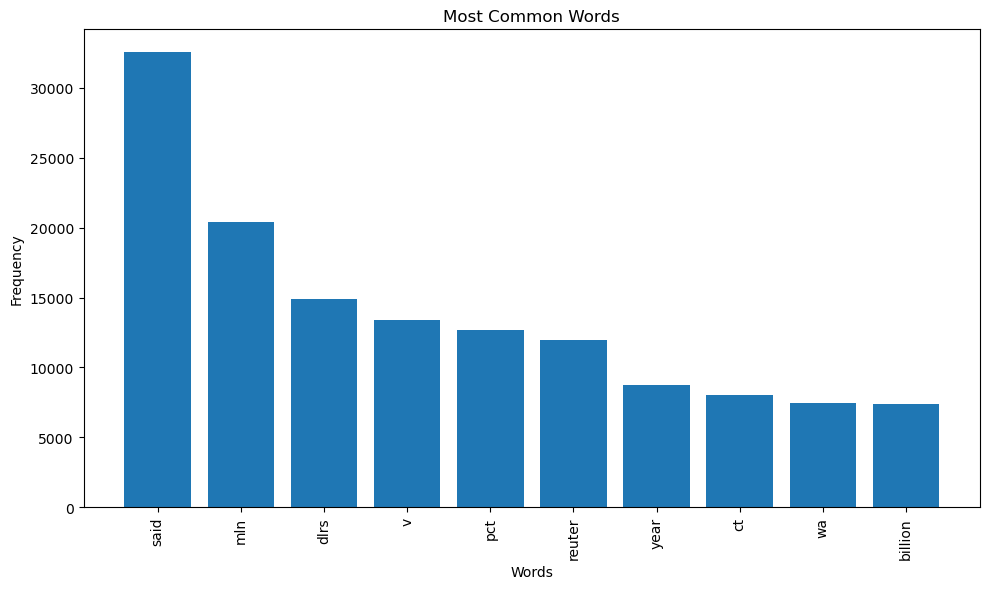

In [12]:
# visualizing the most common word
# Count the frequency of each word

import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import matplotlib.pyplot as plt
from collections import Counter

# Assuming your DataFrame is called 'data' and the column name is 'BODY'
column_name = 'BODY'

# Combine all the texts in the specified column into a single string
column_text = ' '.join(data[column_name])

# Tokenize the text into individual words
words = word_tokenize(column_text)

# Remove stopwords (common words like 'the', 'is', 'and', etc.)
stopwords = set(stopwords.words('english'))
filtered_words = [word for word in words if word.lower() not in stopwords]

# Count the frequency of each word
word_freq = Counter(filtered_words)

# Select the top N most common words
top_n = 10
top_words = word_freq.most_common(top_n)

# Extract the word and frequency information
words, frequencies = zip(*top_words)

# Output the most common words
for word, frequency in top_words:
    print(f"{word}: {frequency}")

# Plot the word frequencies
plt.figure(figsize=(10, 6))
plt.bar(words, frequencies)
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Most Common Words')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

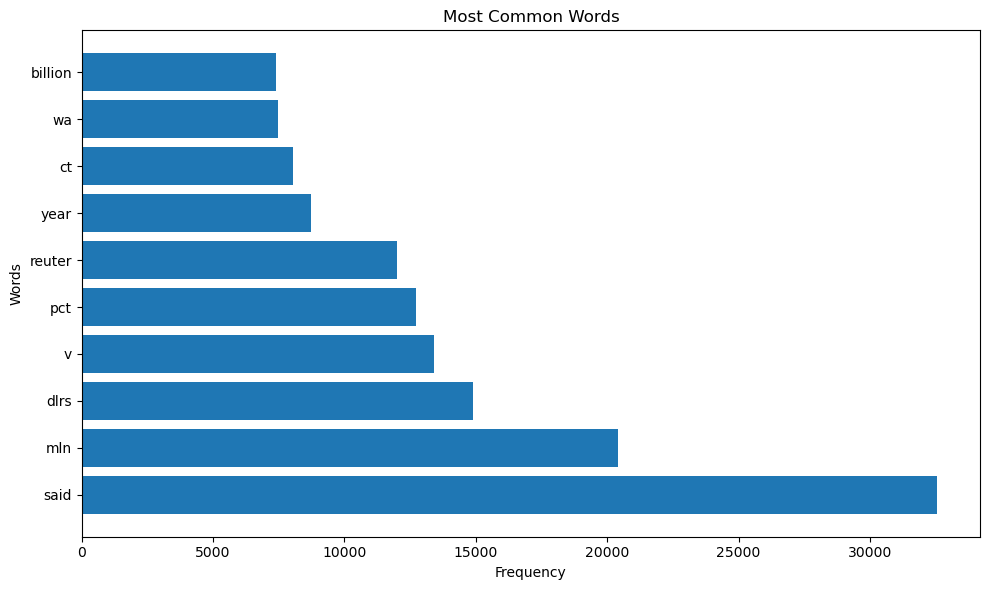

In [13]:
## visualizing the most common word
plt.figure(figsize=(10, 6))
plt.barh(words, frequencies)
plt.ylabel('Words')
plt.xlabel('Frequency')
plt.title('Most Common Words')
plt.tight_layout()
plt.show()

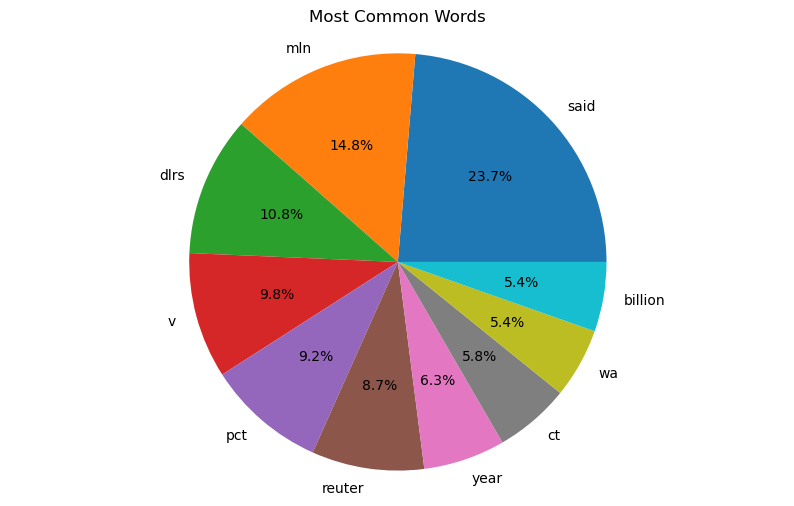

In [14]:
## visualizing the most common word
plt.figure(figsize=(10, 6))
plt.pie(frequencies, labels=words, autopct='%1.1f%%')
plt.title('Most Common Words')
plt.axis('equal')
plt.show()

     -------------------------------------- 153.3/153.3 kB 1.0 MB/s eta 0:00:00


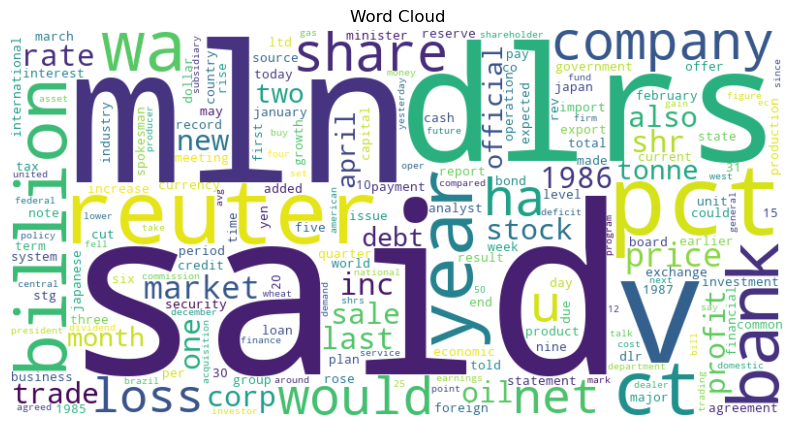

In [15]:
## visualizing the most common word
!pip install wordcloud

from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Create a word cloud from the word frequencies
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_freq)

# Plot the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud')
plt.show()

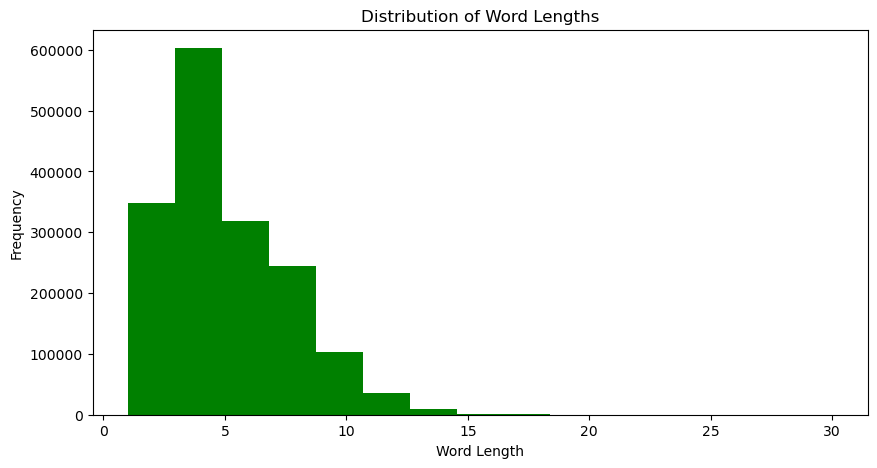

In [16]:
#visualizations for the articles 
word_lengths = data['BODY'].str.split().apply(lambda x: [len(word) for word in x])
word_lengths = [length for sublist in word_lengths for length in sublist]

plt.figure(figsize=(10, 5))
plt.hist(word_lengths, bins=15, color='green')
plt.xlabel('Word Length')
plt.ylabel('Frequency')
plt.title('Distribution of Word Lengths')
plt.show()

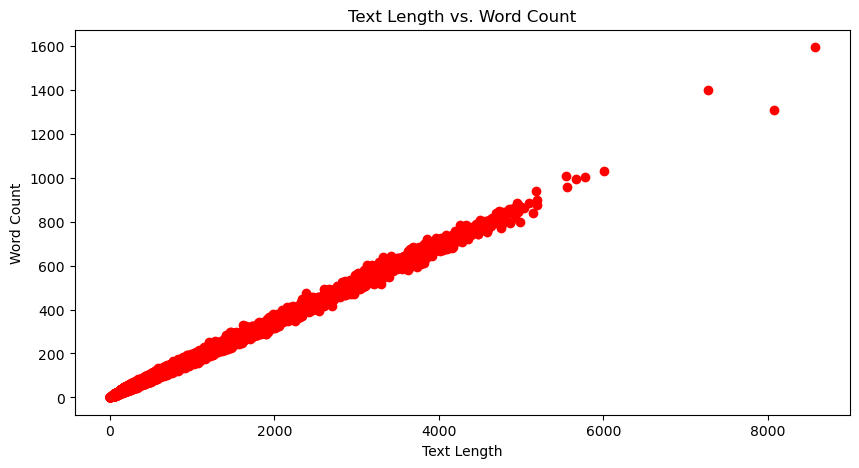

In [17]:
##visualizations for the articles
text_lengths = data['BODY'].str.len()
word_counts = data['BODY'].str.split().apply(len)

plt.figure(figsize=(10, 5))
plt.scatter(text_lengths, word_counts, color='red')
plt.xlabel('Text Length')
plt.ylabel('Word Count')
plt.title('Text Length vs. Word Count')
plt.show()

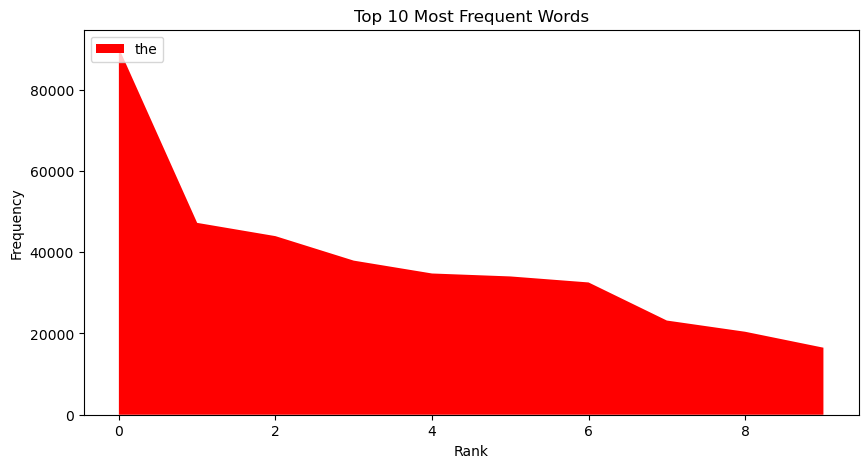

In [53]:
#visualizations for the articles
word_counts = data['BODY'].str.split(expand=True).stack().value_counts()

plt.figure(figsize=(10, 5))
plt.stackplot(range(10), word_counts.values[:10], labels=word_counts.index[:10], colors=['red', 'green', 'blue', 'orange', 'purple', 'yellow', 'pink', 'brown', 'gray', 'cyan'])
plt.xlabel('Rank')
plt.ylabel('Frequency')
plt.title('Top 10 Most Frequent Words')
plt.legend(loc='upper left')
plt.show()

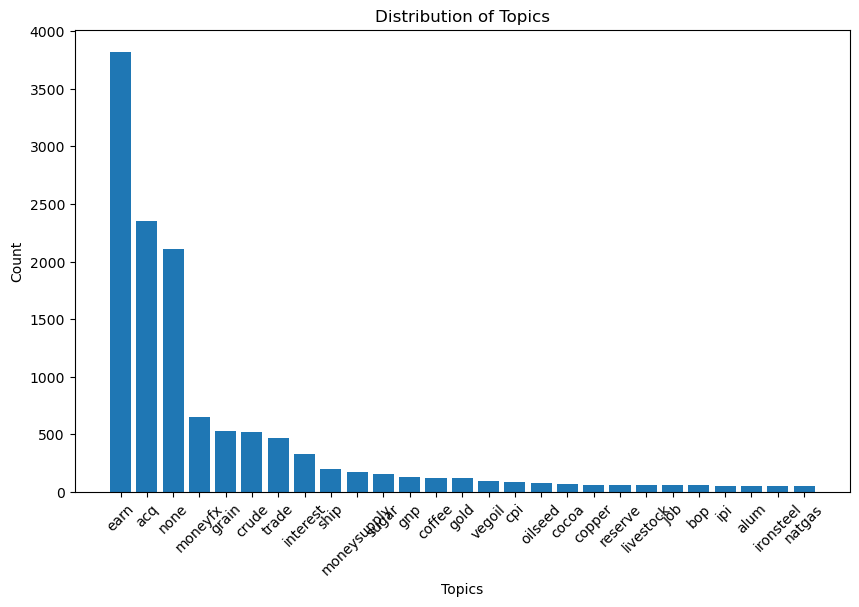

In [19]:
topic_counts = data['TOPICS'].value_counts()
filtered_topics = topic_counts[topic_counts > 50]
plt.figure(figsize=(10, 6))  # Set the figure size
plt.bar(filtered_topics.index, filtered_topics.values)  # Plot the bar chart
plt.xlabel('Topics')  # Set the x-axis label
plt.ylabel('Count')  # Set the y-axis label
plt.title('Distribution of Topics')  # Set the title
plt.xticks(rotation=45)  # Rotate the x-axis labels for better readability
plt.show()  # Display the chart


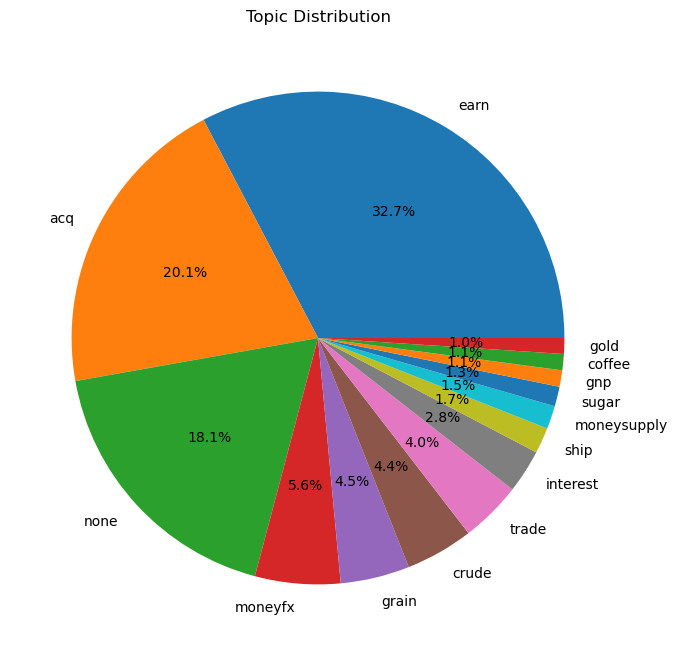

In [20]:
filtered_topics = topic_counts[topic_counts > 100]
plt.figure(figsize=(8, 8))
plt.pie(filtered_topics, labels=filtered_topics.index, autopct='%1.1f%%')
plt.title('Topic Distribution')
plt.show()

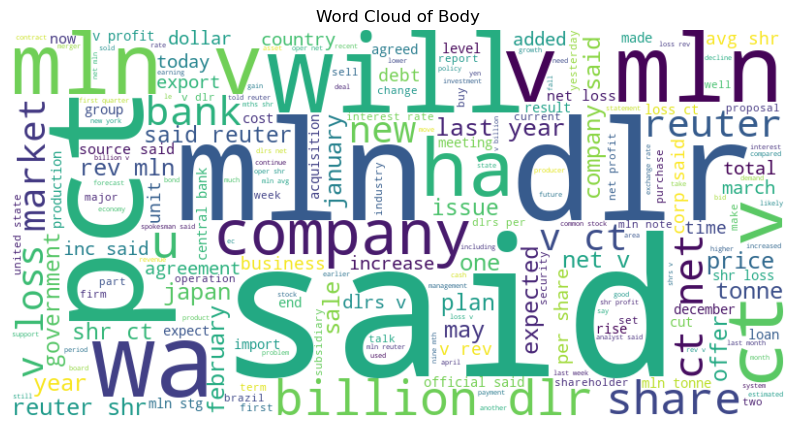

In [21]:
# Convert the 'BODY' column to string type
data['BODY'] = data['BODY'].astype(str)

# Combine all the values in the 'BODY' column into a single string
body_text = ' '.join(data['BODY'])

# Generate a word cloud object from the combined text
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(body_text)

# Create a new figure for the plot with a specified size
plt.figure(figsize=(10, 6))

# Display the word cloud image
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Body')
plt.show()


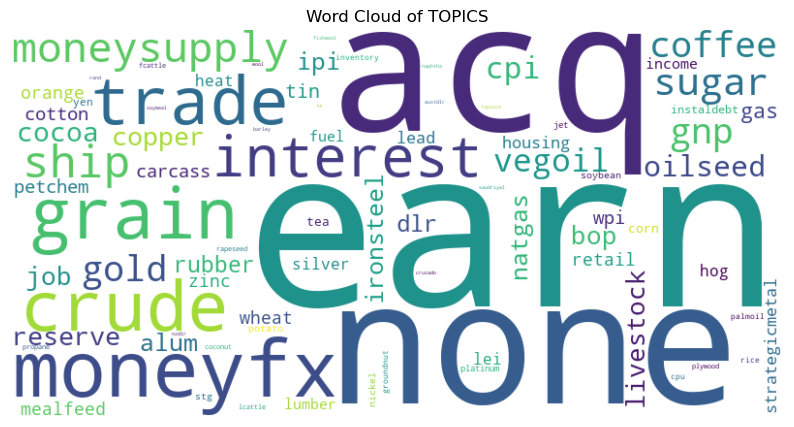

In [22]:
# Convert the 'TOPICS' column to string type
data['TOPICS'] = data['TOPICS'].astype(str)

# Combine all the values in the 'TOPICS' column into a single string
topic_text = ' '.join(data['TOPICS'])

# Count the frequency of each word in the 'TOPICS' column
word_counts = Counter(topic_text.split())

# Generate a word cloud object from the word frequencies
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_counts)

# Create a new figure for the plot with a specified size
plt.figure(figsize=(10, 6))

# Display the word cloud image
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of TOPICS')
plt.show()


## CSV File

In [70]:
Documents = reuters.fileids()[:200] # Choosing the first 200 documents as a subset
Corpus = [' '.join(word_tokenize(reuters.raw(doc_id).lower())) for doc_id in Documents]
TFIDF_vectorizer = TfidfVectorizer(stop_words='english')
TFIDF_matrix = TFIDF_vectorizer.fit_transform(Corpus)
similarity_matrix = cosine_similarity(TFIDF_matrix, TFIDF_matrix)
similarity_matrix_df = pd.DataFrame(similarity_matrix, index=Documents, columns=Documents)
similarity_matrix_df.to_csv('similarity_matrix_Reuters.csv')
print(f"similarity matrix saved to similarity_matrix_Reuters")

similarity matrix saved to similarity_matrix_Reuters


In [71]:
similarity_Data = pd.read_csv('similarity_matrix_Reuters.csv')
similarity_Data.shape

(200, 201)

In [73]:
similarity_Data.head(20)

,Unnamed: 0,test/14826,test/14828,test/14829,test/14832,test/14833,test/14839,test/14840,test/14841,test/14842,...,test/15206,test/15207,test/15208,test/15210,test/15211,test/15212,test/15213,test/15217,test/15219,test/15220
0,test/14826,1.000000,0.029903,0.137448,0.155981,0.076486,0.073758,0.129718,0.035657,0.053524,...,0.115617,0.009741,0.010775,0.046780,0.035749,0.052883,0.102841,0.024356,0.034776,0.035851
1,test/14828,0.029903,1.000000,0.032329,0.101736,0.020776,0.012161,0.028975,0.055328,0.054768,...,0.014364,0.000000,0.059247,0.019502,0.026555,0.036287,0.044446,0.026668,0.008006,0.033130
2,test/14829,0.137448,0.032329,1.000000,0.090797,0.064764,0.031650,0.054751,0.022724,0.031408,...,0.057738,0.000000,0.000000,0.013707,0.014861,0.062460,0.050654,0.009482,0.016341,0.029247
3,test/14832,0.155981,0.101736,0.090797,1.000000,0.076354,0.014539,0.083554,0.066814,0.060344,...,0.037282,0.000000,0.000000,0.028685,0.095182,0.075087,0.112830,0.025467,0.022876,0.011352
4,test/14833,0.076486,0.020776,0.064764,0.076354,1.000000,0.009377,0.190336,0.077932,0.015965,...,0.021060,0.013489,0.000000,0.025247,0.000000,0.057056,0.058190,0.013870,0.023934,0.023272
5,test/14839,0.073758,0.012161,0.031650,0.014539,0.009377,1.000000,0.038361,0.018413,0.037014,...,0.034222,0.014530,0.034625,0.013665,0.000000,0.026511,0.028169,0.012682,0.057656,0.009872
6,test/14840,0.129718,0.028975,0.054751,0.083554,0.190336,0.038361,1.000000,0.045405,0.031303,...,0.040886,0.008704,0.009346,0.018278,0.017786,0.069685,0.053419,0.015476,0.033437,0.037436
7,test/14841,0.035657,0.055328,0.022724,0.066814,0.077932,0.018413,0.045405,1.000000,0.022862,...,0.061203,0.000000,0.051962,0.014995,0.026946,0.022044,0.043525,0.018361,0.005358,0.032408
8,test/14842,0.053524,0.054768,0.031408,0.060344,0.015965,0.037014,0.031303,0.022862,1.000000,...,0.017923,0.029957,0.006006,0.038369,0.018714,0.032743,0.084362,0.040428,0.008695,0.036660
9,test/14843,0.087082,0.029522,0.048301,0.073336,0.040214,0.036625,0.063992,0.020598,0.033185,...,0.021142,0.041498,0.023554,0.030985,0.012837,0.061886,0.066741,0.018413,0.026790,0.016272


In [76]:
Documents = reuters.fileids()[:200] # Choosing the first 200 documents as a subset
Corpus = [' '.join(word_tokenize(reuters.raw(doc_id).lower())) for doc_id in Documents]
TFIDF_vectorizer = TfidfVectorizer(stop_words='english')
TFIDF_matrix = TFIDF_vectorizer.fit_transform(Corpus)
similarity_matrix = 1 - cosine_similarity(TFIDF_matrix, TFIDF_matrix)
np.fill_diagonal(similarity_matrix, 0)
Dissimilarity_matrix_df = pd.DataFrame(similarity_matrix, index=Documents, columns=Documents)
Dissimilarity_matrix_df.to_csv('Dissimilarity_matrix_Reuters.csv')
print(f"Dissimilarity matrix saved to Dissimilarity_matrix_Reuters")

Dissimilarity matrix saved to Dissimilarity_matrix_Reuters


In [77]:
Disssimilarity_Data = pd.read_csv('Dissimilarity_matrix_Reuters.csv')
Disssimilarity_Data.shape

(200, 201)

In [78]:
Disssimilarity_Data.head(20)

,Unnamed: 0,test/14826,test/14828,test/14829,test/14832,test/14833,test/14839,test/14840,test/14841,test/14842,...,test/15206,test/15207,test/15208,test/15210,test/15211,test/15212,test/15213,test/15217,test/15219,test/15220
0,test/14826,0.000000,0.970097,0.862552,0.844019,0.923514,0.926242,0.870282,0.964343,0.946476,...,0.884383,0.990259,0.989225,0.953220,0.964251,0.947117,0.897159,0.975644,0.965224,0.964149
1,test/14828,0.970097,0.000000,0.967671,0.898264,0.979224,0.987839,0.971025,0.944672,0.945232,...,0.985636,1.000000,0.940753,0.980498,0.973445,0.963713,0.955554,0.973332,0.991994,0.966870
2,test/14829,0.862552,0.967671,0.000000,0.909203,0.935236,0.968350,0.945249,0.977276,0.968592,...,0.942262,1.000000,1.000000,0.986293,0.985139,0.937540,0.949346,0.990518,0.983659,0.970753
3,test/14832,0.844019,0.898264,0.909203,0.000000,0.923646,0.985461,0.916446,0.933186,0.939656,...,0.962718,1.000000,1.000000,0.971315,0.904818,0.924913,0.887170,0.974533,0.977124,0.988648
4,test/14833,0.923514,0.979224,0.935236,0.923646,0.000000,0.990623,0.809664,0.922068,0.984035,...,0.978940,0.986511,1.000000,0.974753,1.000000,0.942944,0.941810,0.986130,0.976066,0.976728
5,test/14839,0.926242,0.987839,0.968350,0.985461,0.990623,0.000000,0.961639,0.981587,0.962986,...,0.965778,0.985470,0.965375,0.986335,1.000000,0.973489,0.971831,0.987318,0.942344,0.990128
6,test/14840,0.870282,0.971025,0.945249,0.916446,0.809664,0.961639,0.000000,0.954595,0.968697,...,0.959114,0.991296,0.990654,0.981722,0.982214,0.930315,0.946581,0.984524,0.966563,0.962564
7,test/14841,0.964343,0.944672,0.977276,0.933186,0.922068,0.981587,0.954595,0.000000,0.977138,...,0.938797,1.000000,0.948038,0.985005,0.973054,0.977956,0.956475,0.981639,0.994642,0.967592
8,test/14842,0.946476,0.945232,0.968592,0.939656,0.984035,0.962986,0.968697,0.977138,0.000000,...,0.982077,0.970043,0.993994,0.961631,0.981286,0.967257,0.915638,0.959572,0.991305,0.963340
9,test/14843,0.912918,0.970478,0.951699,0.926664,0.959786,0.963375,0.936008,0.979402,0.966815,...,0.978858,0.958502,0.976446,0.969015,0.987163,0.938114,0.933259,0.981587,0.973210,0.983728
